In [9]:
%run runaway_functionsv3

In [12]:
cl = Cluster("UPK_604")


getting isochrone form cmd3.7 with:
Av:2.80
logage:7.10
metallicity:-0.10
isochrone downloaded in 7.7s


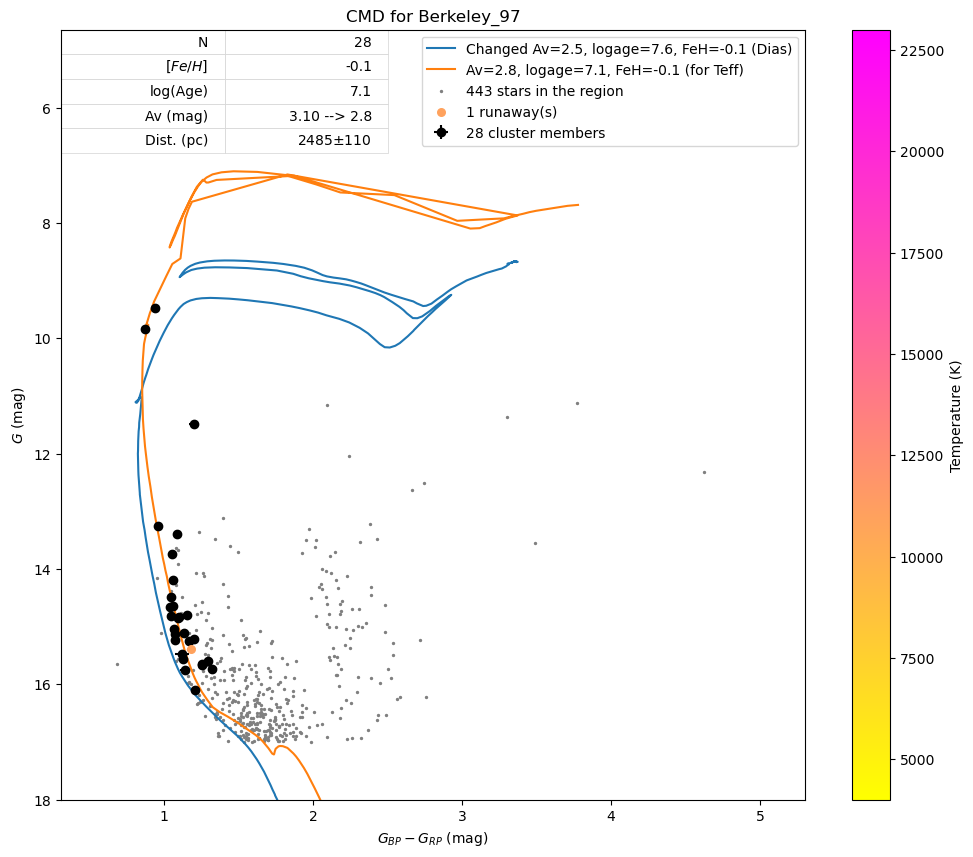

In [2]:
# %matplotlib qt
%run runaway_functionsv3
def plot_cmd(cluster, multiple=False, **kwargs):
    # Initialize plot
    fig, ax = plt.subplots(figsize=(12, 10))
    ax.set_xlabel(r"$G_{BP}-G_{RP}$ (mag)")
    ax.set_ylabel(r"$G$ (mag)")
    ax.set_title(f"CMD for {cluster.name}")
    
    # Theoretical isochrone used for temperature estimate
    cluster_dias = ClusterDias(cluster.name)
    theoretical_isochrone_dias, (Av0, logage0, FeH0) = cluster_dias.theoretical_isochrone(returnparams=True)
    isochrone_theo_dias = ax.plot(
        theoretical_isochrone_dias['BP-RP'], 
        theoretical_isochrone_dias['Gmag'], 
        label=f'Av={Av0}, logage={logage0}, FeH={FeH0} (Dias, for Teff)'
    )[0]  # Access the first element of the list

    # Isochrone for temperature
    theoretical_isochrone_temp, (Av, logage, FeH) = cluster.theoretical_isochrone(kwargs,returnparams=True)
    if not (Av0 == Av and logage0 == logage and FeH0 == FeH):
        isochrone_theo_dias.set_label(f'Changed Av={Av0}, logage={logage0}, FeH={FeH0} (Dias)')
        isochrone_theo = ax.plot(
            theoretical_isochrone_temp['BP-RP'], 
            theoretical_isochrone_temp['Gmag'], 
            label=f'Av={Av}, logage={logage}, FeH={FeH} (for Teff)'
        )[0]  # Access the first element of the list

    # # Ensure the legend is updated with the new labels
    # ax.legend()

    # Set plot limits
    ax.set_ylim(bottom=min(theoretical_isochrone_dias['Gmag'])-4, top=18)
    ax.set_xlim(left=min(theoretical_isochrone_dias['BP-RP'])-0.5, right=max(theoretical_isochrone_dias['BP-RP']))

    # Scatter cluster members
    mymembers = cluster.mymembers
    scatter_members = ax.errorbar(
        mymembers['BP-RP'], mymembers['Gmag'], 
        color='black', zorder=2, fmt='o',
        xerr=mymembers['e_BP-RP']+0.02, yerr=mymembers['e_Gmag'],
        label=rf'{len(mymembers)} cluster members'
    )

    # Scatter stars in the region
    stars_in_region = cluster.stars_in_region()
    scatter_sir = ax.scatter(
        stars_in_region['BP-RP'], stars_in_region['Gmag'],
        s=2, color='grey', zorder=1, label=f"{len(stars_in_region)} stars in the region"
    )

    # Scatter runaways
    runaways = cluster.runaways()
    runaways = estimate_temperature(runaways, theoretical_isochrone_temp)
    scatter_runaways = ax.scatter(
        runaways['BP-RP'], runaways['Gmag'],
        s=30, zorder=4,
        c=runaways['Temp. Est'],
        cmap='spring_r', norm=plt.Normalize(4000, 23000),
        label=f'{len(runaways)} runaway(s)'
    )

    colorbar = fig.colorbar(scatter_runaways, ax=ax)
    colorbar.set_label('Temperature (K)')

    # Table for cluster parameters
    cluster_table = [
        ['N', len(mymembers)],
        [r'$[Fe/H]$', cluster.FeH],
        ['log(Age)', cluster.logage],
        ['Av (mag)', round(cluster.Av.value, 2)],
        ['Dist. (pc)', str(round(cluster.distance.value))+"$\pm$"+f'{cluster.all["e_Dist"]}']
    ]

    # Update Metallicity if changed
    if 'FeH' in kwargs and kwargs['FeH'] != cluster.FeH:
        cluster_table[1][1] = f'{cluster.FeH:.2f} --> {kwargs["FeH"]}'

    # Update Logage if changed
    if 'logage' in kwargs and kwargs['logage'] != cluster.logage:
        cluster_table[2][1] = f'{cluster.logage:.2f} --> {kwargs["logage"]}'

    # Update Av if changed
    if 'Av' in kwargs and kwargs['Av'] != cluster.Av:
        cluster_table[3][1] = f'{cluster.Av.value:.2f} --> {kwargs["Av"]}'

    table_bbox = [0.0, 0.84, 0.44, 0.16]  # [left, bottom, width, height]
    table = ax.table(cellText=cluster_table, cellLoc='right', loc='upper left', bbox=table_bbox)

    for key, cell in table._cells.items():
        cell.set_linewidth(0.5)  # Set the border width
        cell.set_edgecolor('lightgray')  # Set the border color

    ax.invert_yaxis()
    ax.legend()

    # plt.show()  # Ensure the plot is displayed

    return None
cl = Cluster("Berkeley_97")
plot_cmd(cl,Av=2.8)


In [4]:
cl.changeParam(("Av",2.8))

Changed Av         2.54 --> 2.80


In [6]:
cl.members()

[2008383302396655488] found from config file
52 out of 155 dias members found in search region
Changed N          89.00 --> 28.00
Changed Plx        0.31 --> 0.34
Changed e_Plx      0.08 --> 0.02
Changed Dist       2485.00 --> 2769.03
Changed e_Dist     110.00 --> 132.11
Changed pmRA       -2.70 --> -2.73
Changed e_pmRA     0.18 --> 0.10
Changed pmDE       -1.83 --> -1.88
Changed e_pmDE     0.14 --> 0.10
Changed RV         -- --> --
Changed e_RV       -- --> --
Changed NRV        -- --> 0.00


RA_ICRS_1,DE_ICRS_1,e_RA_ICRS,e_DE_ICRS,_r_1,HIP,TYC2,Source,rgeo,Plx,e_Plx,pmRA,pmDE,e_pmRA,e_pmDE,RUWE,Teff,logg,Gmag,BP-RP,BPmag,RPmag,RV,e_RV,b_rgeo,B_rgeo,FG,e_FG,FBP,e_FBP,FRP,e_FRP,RAVE5,RAVE6,e_Gmag,e_BPmag,e_RPmag,e_BP-RP,SkyCoord,Pmemb
deg,deg,mas,mas,,,,,pc,mas,mas,mas / yr,mas / yr,mas / yr,mas / yr,,K,log(cm.s**-2),mag,mag,mag,mag,km / s,km / s,pc,pc,,,,,,,,,,,,,"deg,deg,pc",
float64,float64,float64,float64,float64,int32,str11,int64,float64,float64,float32,float64,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float32,float32,float32,float32,float32,str1,str1,float64,float32,float32,float32,SkyCoord,float64
339.84392032630,59.00715291679,0.0293,0.0308,0.2402,--,3995-625-1,2008383302396655488,2630.22485000,0.3652,0.0363,-2.873,-2.301,0.038,0.038,3.035,18135.5,3.3302,9.473729,0.937676,9.843719,8.906042,--,--,2393.19263000,2940.37549000,3058125.18769,951.5,1.577e+06,1154,2.171e+06,1124,--,--,0.002776,0.002901,0.003821,0.006722,"339.8439203263,59.00715291679,2630.22485",1.0
339.82384023875,59.01681945374,0.0097,0.0105,1.0890,--,3995-1075-1,2008430237808841600,2657.56860000,0.3583,0.0125,-2.747,-1.911,0.013,0.013,0.986,--,--,9.840384,0.868947,10.178231,9.309284,--,--,2587.60059000,2734.51587000,2181691.83228,1048,1.159e+06,1141,1.498e+06,1215,--,--,0.002804,0.002988,0.003881,0.006869,"339.82384023875,59.01681945374,2657.5686",1.0
340.10268328507,58.97390297864,0.0097,0.0107,8.0278,--,3996-1228-1,2008380794144211712,2570.86328000,0.3525,0.0122,-2.679,-1.930,0.013,0.014,0.903,--,--,11.482301,1.201067,11.985507,10.784440,--,--,2498.03125000,2653.16870000,480868.62054,798.2,2.194e+05,725.5,3.849e+05,2491,--,--,0.003292,0.004547,0.007978,0.01253,"340.10268328507,58.97390297864,2570.86328",0.9
339.82166004461,59.00297803329,0.0089,0.0097,0.8784,--,--,2008430203449108224,2525.15747000,0.3648,0.0114,-2.953,-1.724,0.012,0.012,0.988,--,--,13.262117,0.961862,13.648018,12.686156,--,--,2459.89844000,2592.30542000,93346.90312,21.67,4.745e+04,60.24,6.679e+04,44.71,--,--,0.002767,0.003112,0.003849,0.006961,"339.82166004461,59.00297803329,2525.15747",1.0
339.83338202067,58.98750271338,0.0091,0.0096,1.1463,--,--,2008383199325604224,2978.19849000,0.3072,0.0117,-2.775,-2.013,0.012,0.011,0.977,12569.3,3.7629,13.395822,1.084518,13.845118,12.760600,--,--,2882.58301000,3083.82324000,82531.22131,15.52,3.957e+04,24.21,6.236e+04,37.18,--,--,0.002763,0.002868,0.003834,0.006703,"339.83338202067,58.98750271338,2978.19849",1.0
339.83149509410,59.00643294158,0.0115,0.0121,0.5796,--,--,2008430233501492608,2819.80103000,0.3264,0.0143,-2.683,-1.821,0.015,0.015,1.106,11137.8,3.7591,13.733361,1.051120,14.166042,13.114923,--,--,2711.16553000,2953.69116000,60478.66064,18.07,2.944e+04,28.91,4.5e+04,48.77,--,--,0.002774,0.002987,0.003958,0.006945,"339.8314950941,59.00643294158,2819.80103",1.0
339.84074866849,59.00514934930,0.0134,0.0139,0.2851,--,--,2008383302404812544,2604.80005000,0.3569,0.0163,-2.626,-1.913,0.018,0.017,1.124,11638.8,3.8049,14.199184,1.058014,14.629308,13.571294,--,--,2466.69116000,2720.19312000,39379.74224,11.71,1.922e+04,51.21,2.956e+04,27.21,--,--,0.002774,0.00402,0.003909,0.007929,"339.84074866849,59.0051493493,2604.80005",1.0
339.85983016055,59.00845000045,0.0134,0.0137,0.3836,--,--,2008384779873564032,2623.42310000,0.3563,0.0168,-2.780,-1.834,0.017,0.016,1.021,10857.5,3.8294,14.490845,1.049156,14.918883,13.869727,--,--,2502.20532000,2719.62866000,30102.94455,6.87,1.472e+04,15.67,2.245e+04,17.55,--,--,0.002766,0.00302,0.003874,0.006894,"339.85983016055,59.00845000045,2623.4231",1.0


In [7]:
cl = Cluster("Berkeley_97")
cld = ClusterDias("Berkeley_97")

cl.distance, cld.distance

(<Quantity 2769. pc>, <Distance 2485. pc>)

(<Figure size 1200x1000 with 2 Axes>,
 <AxesSubplot: title={'center': 'CMD for Berkeley_97'}, xlabel='$G_{BP}-G_{RP}$ (mag)', ylabel='$G$ (mag)'>)

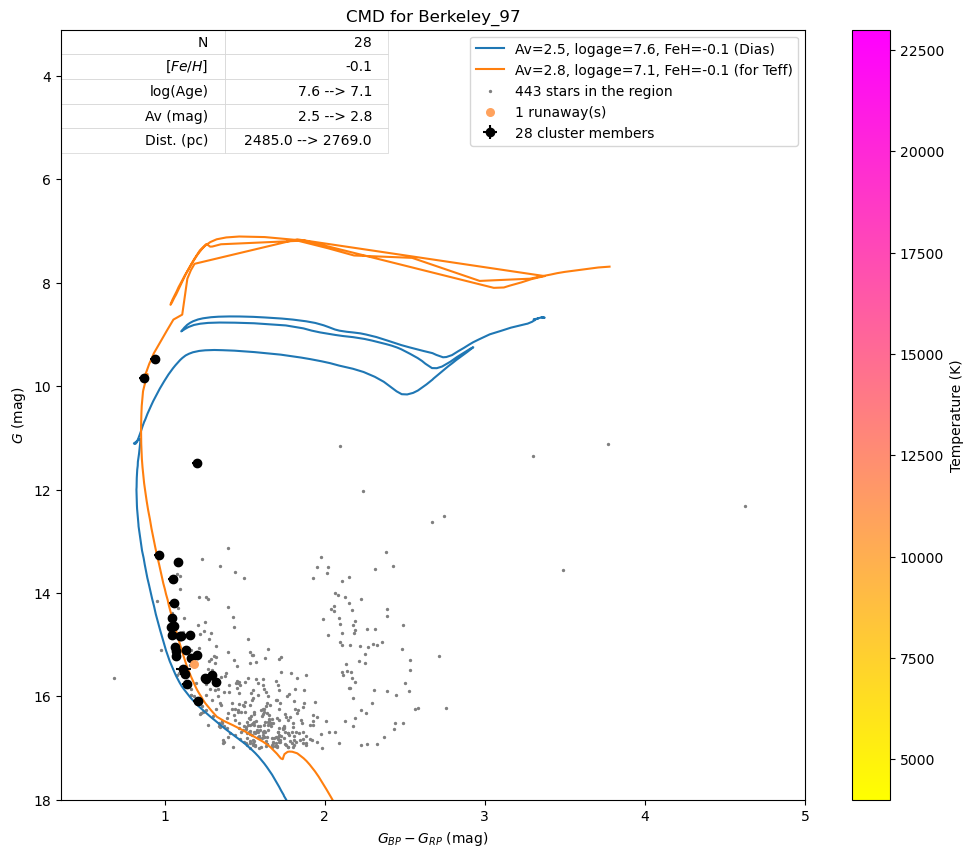

In [8]:
# Import necessary libraries
import matplotlib.pyplot as plt
from runaway_functionsv3 import Cluster, ClusterDias, estimate_temperature

# Function to plot isochrones
def plot_isochrones(ax, cluster, **kwargs):
    cluster_dias = ClusterDias(cluster.name)
    theoretical_isochrone_dias, (Av0, logage0, FeH0) = cluster_dias.theoretical_isochrone(returnparams=True)
    isochrone_theo_dias = ax.plot(
        theoretical_isochrone_dias['BP-RP'], 
        theoretical_isochrone_dias['Gmag'], 
        label=f'Av={Av0}, logage={logage0}, FeH={FeH0} (Dias, for Teff)'
    )[0]
    
    theoretical_isochrone_temp, (Av, logage, FeH) = cluster.theoretical_isochrone(kwargs, returnparams=True)
    if not (Av0 == Av and logage0 == logage and FeH0 == FeH):
        isochrone_theo_dias.set_label(f'Av={Av0}, logage={logage0}, FeH={FeH0} (Dias)')
        isochrone_theo = ax.plot(
            theoretical_isochrone_temp['BP-RP'], 
            theoretical_isochrone_temp['Gmag'], 
            label=f'Av={Av}, logage={logage}, FeH={FeH} (for Teff)'
        )[0]
    return isochrone_theo_dias

# Function to plot cluster members
def plot_cluster_members(ax, cluster):
    mymembers = cluster.mymembers
    scatter_members = ax.errorbar(
        mymembers['BP-RP'], mymembers['Gmag'], 
        color='black', zorder=2, fmt='o',
        xerr=mymembers['e_BP-RP']+0.02, yerr=mymembers['e_Gmag'],
        label=rf'{len(mymembers)} cluster members'
    )
    return scatter_members

# Function to plot stars in the region
def plot_stars_in_region(ax, cluster):
    stars_in_region = cluster.stars_in_region()
    scatter_sir = ax.scatter(
        stars_in_region['BP-RP'], stars_in_region['Gmag'],
        s=2, color='grey', zorder=1, label=f"{len(stars_in_region)} stars in the region"
    )
    return scatter_sir

# Function to plot runaways
def plot_runaways(ax, cluster, theoretical_isochrone_temp):
    runaways = cluster.runaways()
    runaways = estimate_temperature(runaways, theoretical_isochrone_temp)
    scatter_runaways = ax.scatter(
        runaways['BP-RP'], runaways['Gmag'],
        s=30, zorder=4,
        c=runaways['Temp. Est'],
        cmap='spring_r', norm=plt.Normalize(4000, 23000),
        label=f'{len(runaways)} runaway(s)'
    )
    return scatter_runaways

# Function to add colorbar
def add_colorbar(fig, scatter_runaways, ax):
    colorbar = fig.colorbar(scatter_runaways, ax=ax)
    colorbar.set_label('Temperature (K)')
    return colorbar

# Function to add cluster parameters table
def add_cluster_parameters_table(ax, cluster):
    cluster_dias = ClusterDias(cluster.name)
    print()
    cluster_table = [
        ['N', len(cluster.mymembers)],
        [r'$[Fe/H]$', cluster.FeH],
        ['log(Age)', cluster.logage],
        ['Av (mag)', round(cluster.Av.value, 2)],
        ['Dist. (pc)', str(round(cluster.distance.value))+"$\pm$"+f'{cluster.all["e_Dist"]}']
    ]

    if cluster.FeH != cluster_dias.FeH:
        cluster_table[1][1] = f'{cluster_dias.FeH:.1f} --> {round(float(cluster.FeH),1)}'
    if cluster.logage != cluster_dias.logage:
        cluster_table[2][1] = f'{cluster_dias.logage:.1f} --> {round(float(cluster.logage),1)}'
    if cluster.Av != cluster_dias.Av:
        cluster_table[3][1] = f'{cluster_dias.Av.value:.1f} --> {round(float(cluster.Av.value),1)}'
    if cluster.distance != cluster_dias.distance:
        cluster_table[4][1] = f'{cluster_dias.distance.value:.1f} --> {round(float(cluster.distance.value),1)}'

    table_bbox = [0.0, 0.84, 0.44, 0.16]  # [left, bottom, width, height]
    table = ax.table(cellText=cluster_table, cellLoc='right', loc='upper left', bbox=table_bbox)

    for key, cell in table._cells.items():
        cell.set_linewidth(0.5)
        cell.set_edgecolor('lightgray')
    return table

# Main function to plot CMD
def plot_cmd(cluster, multiple=False, **kwargs):
    fig, ax = plt.subplots(figsize=(12, 10))
    ax.set_xlabel(r"$G_{BP}-G_{RP}$ (mag)")
    ax.set_ylabel(r"$G$ (mag)")
    ax.set_title(f"CMD for {cluster.name}")

    isochrone_theo_dias = plot_isochrones(ax, cluster, **kwargs)
    plot_cluster_members(ax, cluster)
    plot_stars_in_region(ax, cluster)

    theoretical_isochrone_temp = cluster.theoretical_isochrone(kwargs)
    scatter_runaways = plot_runaways(ax, cluster, theoretical_isochrone_temp)
    add_colorbar(fig, scatter_runaways, ax)
    add_cluster_parameters_table(ax, cluster)

    ax.set_ylim(bottom=min(theoretical_isochrone_temp['Gmag'])-4, top=18)
    ax.set_xlim(left=min(theoretical_isochrone_temp['BP-RP'])-0.5, right=5)
    ax.invert_yaxis()
    ax.legend()
    
    # Optional: make points clickable (code to be implemented)
    # make_points_clickable(ax, scatter_runaways)

    return fig, ax

# Example usage
cl = Cluster("Berkeley_97")
plot_cmd(cl)


In [37]:
dias2021 = Table.read("dias2021.tsv", format="ascii.ecsv")
maskplx = dias2021['Plx'] > 0.3
maskage = dias2021['logage'] < 7.7
workclusters = []
for clustername in dias2021[maskplx & maskage][:]['Cluster']:
    if clustername not in ['ASCC_79','BH_164','BH_23','Collinder_135','Collinder_140','Gulliver_9','IC_2391','IC_2602','Mamajek_1','Platais_8','UPK_535','UPK_606','UPK_640','Berkeley_59','COIN-Gaia_37','Ivanov_4','LP_1937','Sigma_Ori','UBC_632']:
        workclusters.append(clustername)
        # print(clustername)
        # cl = Cluster(clustername)
        # cl.prepare_trace()
# cl.stars_in_region()
# cl.stars_in_region()

In [ ]:
workclusters_mask = [cluster in workclusters for cluster in dias2021['Cluster']]
workclusterstable = dias2021[workclusters_mask]

rvexists = workclusterstable['RV'].mask
nrvgood = workclusterstable['NRV'] > 4

workclusterstable[~rvexists & nrvgood]

In [ ]:
def runaways_from(clustername):
    cl = Cluster(clustername)
    fs4giesler = cl.fast_stars_in_region()
    outputs = os.listdir(f"/home/surodeep/suro_aiu/traceback/cluster_runaway/{cl.name}/runaways/")
    linenos = []
    for output in outputs:
        #print(output)
        if 'run' in output:
            linenos.append(int(output.split("+")[1].replace(".out","")))
    linenos.sort()
    # print(linenos)
    i=np.array(linenos)-3
    def source_of(lineno, input_table):
        return input_table[lineno-2]['Source']
    return fs4giesler[i]
for cluster in workclusters:
    t = runaways_from(cluster)[runaways_from(cluster)['Teff'].argmax()]['Teff']
    
    if t>10000:
        print(cluster, t,runaways_from(cluster)[runaways_from(cluster)['Teff'].argmax()]['Source'])